# Create multi-element airfoil data

In [79]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [44]:
PATH_DATA = Path("../data/coordinates")
list(PATH_DATA.glob("*"))

[PosixPath('../data/coordinates/.DS_Store'),
 PosixPath('../data/coordinates/body.png'),
 PosixPath('../data/coordinates/slot.png'),
 PosixPath('../data/coordinates/cove.png'),
 PosixPath('../data/coordinates/cove.csv'),
 PosixPath('../data/coordinates/processed'),
 PosixPath('../data/coordinates/raw')]

In [45]:
# Paths
path_raw = PATH_DATA / "raw"
path_processed = PATH_DATA / "processed"

## Scale raw data

In [46]:
names = ["main", "slot", "cove"]

# Operations
X_LOWER = "X_lower"
X_UPPER = "X_upper"
Y_LOWER = "Y_lower"
Y_UPPER = "Y_upper"

In [47]:
coordinates = dict()
for name in names:

    _name = name + ".csv"
    _coordinates = pd.read_csv(path_raw / _name)
    
    # Scale
    _coordinates = _coordinates.div(100.0).round(6)

    # Save
    coordinates[name] = _coordinates.copy()
    
    _coordinates.to_csv(path_or_buf = path_processed / _name , index=False)

## Build airfoils

In [119]:
main = coordinates["main"]
cove = coordinates["cove"]

### Main element

#### Lower surface

In [120]:
main_lower = main.filter(regex="lower")
cove_lower = cove.filter(regex="lower")

In [121]:
min_x = cove_lower[X_LOWER].min()
mask = main_lower[X_LOWER] < min_x

main_lower = main_lower.loc[mask].append(cove_lower).set_index(X_LOWER)

#### Upper surface

In [122]:
main_upper = main.filter(regex="upper")
cove_upper = cove.filter(regex="upper")

In [126]:
min_x = cove_upper[X_UPPER].min()
mask = main_upper[X_UPPER] < min_x

main_upper = main_upper.loc[mask].append(cove_upper).set_index(X_UPPER)

# Fill in the gaps
main_upper = main_upper.reset_index(drop=False).dropna(subset=[X_UPPER]).set_index(X_UPPER)
main_upper = main_upper.interpolate(method="index")

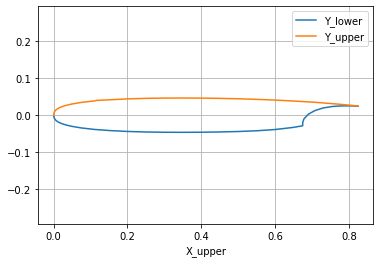

In [128]:
ax = main_lower.plot()
main_upper.plot(ax = ax)

plt.axis('equal')
plt.grid()